
# <span style="color:rgb(213,80,0)">URI machine learning benchmark</span>

One of the experiments in the CLASSIX paper [1] compares several clustering algorithms on the URI machine learning repository [2]. The Python code that generated these results, together with all the used hyperparameters, is available in the CLASSIX GitHub repository: [https://github.com/nla-group/classix/blob/master/exp/run_real_world.py](https://github.com/nla-group/classix/blob/master/exp/run_real_world.py)


Let's reproduce the column "CLASSIX (distance)" in Table 2 of [1].


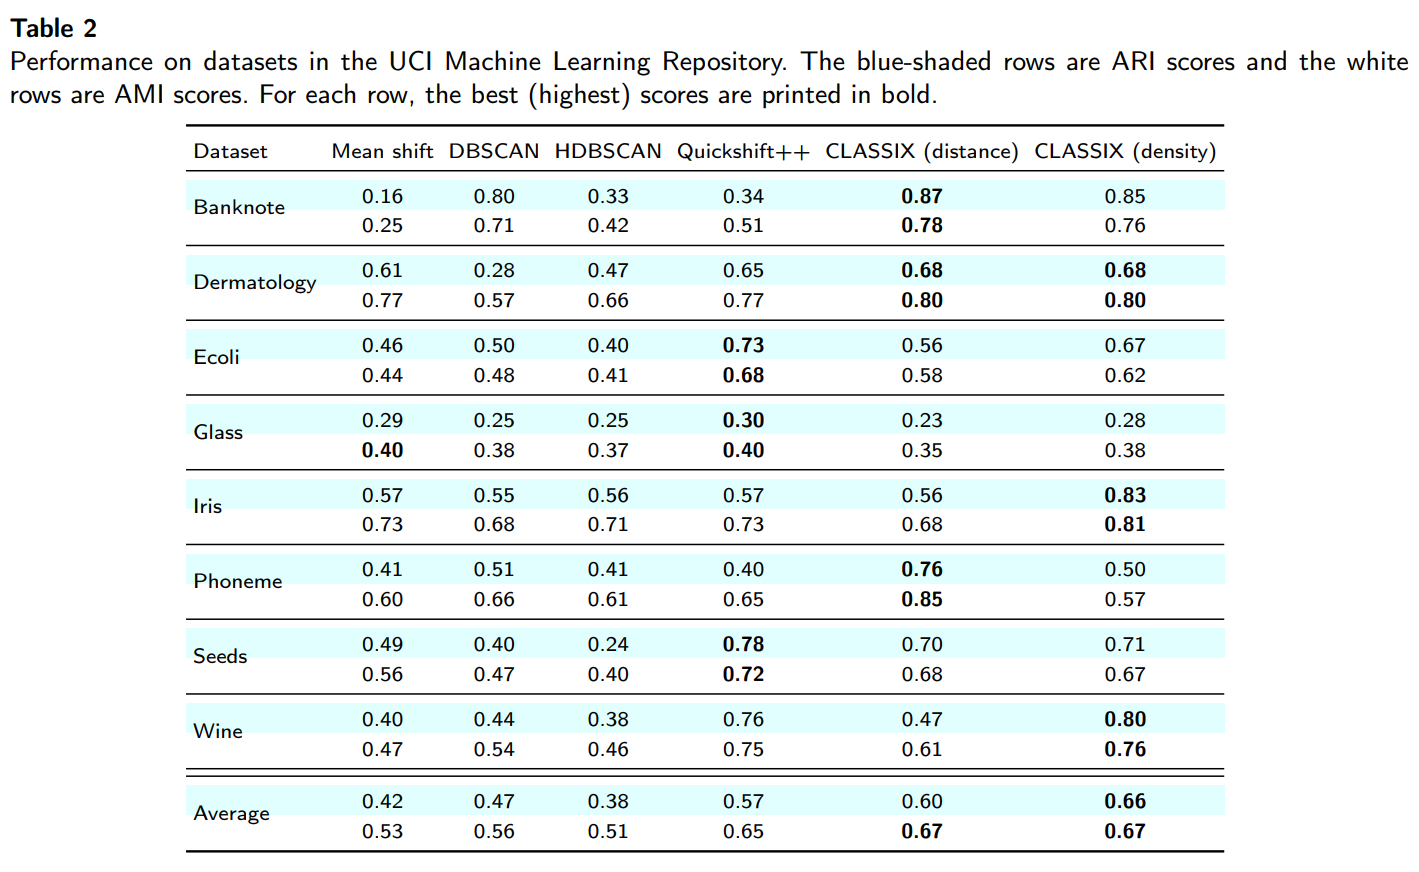


First, we create a function handle to compute the adjusted Rand index (ARI).


In [31]:
from classix import CLASSIX, loadData
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score as ari
from time import time
import numpy as np


Now we run each of the datasets, using as parameters the ones used in the CLASSIX paper.


In [34]:
data, y = loadData('Banknote')
data = (data - data.mean(axis=0))/data.std(axis=0) # z-normalization

st = time()
clx = CLASSIX(radius=0.21, minPts=41, verbose=0)
clx.fit(data)

print('Banknote runtime: {:5.3f} seconds - classes: {} - ARI: {:3.2}\n'.format
      (time()-st, len(np.unique(clx.labels_)), ari(clx.labels_,y)))

Banknote runtime: 0.034 seconds - classes: 2 - ARI: 0.87



In [38]:
data, y = loadData('Dermatology')
nonans = np.isnan(data).sum(1) == 0 # data has NaNs in the last column
data = data[nonans,:]
y = y[nonans]
data = (data - data.mean(axis=0))/data.std(axis=0) # z-normalization

st = time()
clx = CLASSIX(radius=0.4, minPts=4, verbose=0)
clx.fit(data)

print('Dermatology runtime: {:5.3f} seconds - classes: {} - ARI: {:3.2}\n'.format
      (time()-st, len(np.unique(clx.labels_)), ari(clx.labels_,y)))

Dermatology runtime: 0.079 seconds - classes: 7 - ARI: 0.68



In [39]:
data, y = loadData('Ecoli')
data = (data - data.mean(axis=0))/data.std(axis=0) # z-normalization

st = time()
clx = CLASSIX(radius=0.3, minPts=4, verbose=0)
clx.fit(data)

print('Ecoli runtime: {:5.3f} seconds - classes: {} - ARI: {:3.2}\n'.format
      (time()-st, len(np.unique(clx.labels_)), ari(clx.labels_,y)))

Ecoli runtime: 0.026 seconds - classes: 7 - ARI: 0.56



In [40]:
data, y = loadData('Glass')
data = (data - data.mean(axis=0))/data.std(axis=0) # z-normalization

st = time()
clx = CLASSIX(radius=0.725, minPts=1, verbose=0)
clx.fit(data)

print('Glass runtime: {:5.3f} seconds - classes: {} - ARI: {:3.2}\n'.format
      (time()-st, len(np.unique(clx.labels_)), ari(clx.labels_,y)))

Glass runtime: 0.007 seconds - classes: 26 - ARI: 0.23



In [41]:
data, y = loadData('Iris')
data = (data - data.mean(axis=0))/data.std(axis=0) # z-normalization

st = time()
clx = CLASSIX(radius=0.225, minPts=4, verbose=0)
clx.fit(data)

print('Iris runtime: {:5.3f} seconds - classes: {} - ARI: {:3.2}\n'.format
      (time()-st, len(np.unique(clx.labels_)), ari(clx.labels_,y)))

Iris runtime: 0.008 seconds - classes: 4 - ARI: 0.56



In [44]:
data, y = loadData('Phoneme')
data = (data - data.mean(axis=0))/data.std(axis=0) # z-normalization

st = time()
clx = CLASSIX(radius=0.445, minPts=8, verbose=0)
clx.fit(data)

print('Phoneme runtime: {:5.3f} seconds - classes: {} - ARI: {:3.2}\n'.format
      (time()-st, len(np.unique(clx.labels_)), ari(clx.labels_,y)))

Phoneme runtime: 8.121 seconds - classes: 4 - ARI: 0.76



In [45]:
data, y = loadData('Seeds')
data = (data - data.mean(axis=0))/data.std(axis=0) # z-normalization

st = time()
clx = CLASSIX(radius=0.15, minPts=9, verbose=0)
clx.fit(data)

print('Seeds runtime: {:5.3f} seconds - classes: {} - ARI: {:3.2}\n'.format
      (time()-st, len(np.unique(clx.labels_)), ari(clx.labels_,y)))

Seeds runtime: 0.063 seconds - classes: 3 - ARI: 0.7



In [46]:
data, y = loadData('Wine')
data = (data - data.mean(axis=0))/data.std(axis=0) # z-normalization

st = time()
clx = CLASSIX(radius=0.425, minPts=4, verbose=0)
clx.fit(data)

print('Wine runtime: {:5.3f} seconds - classes: {} - ARI: {:3.2}\n'.format
      (time()-st, len(np.unique(clx.labels_)), ari(clx.labels_,y)))

Wine runtime: 0.018 seconds - classes: 2 - ARI: 0.47



The results are in agreement with the paper. Almost all clusterings were run in just a couple of milliseconds. Only the Phoneme dataset is slightly harder.

## Learn more about CLASSIX?

CLASSIX is a fast and memory-efficient clustering algorithm which produces explainable results. If you'd like to learn more, here are a couple of online resources:

-  arXiv paper: [https://arxiv.org/abs/2202.01456](https://arxiv.org/abs/2202.01456)
-  Python code: [https://github.com/nla-group/classix](https://github.com/nla-group/classix)
-  MATLAB code: [https://github.com/nla-group/classix-matlab/](https://github.com/nla-group/classix-matlab/)
-  YouTube video: [https://www.youtube.com/watch?v=K94zgRjFEYo](https://www.youtube.com/watch?v=K94zgRjFEYo)
## References

[1] X. Chen and S. Güttel. "Fast and explainable clustering based on sorting." arXiv: [https://arxiv.org/abs/2202.01456](https://arxiv.org/abs/2202.01456), 2022.


[2] D. Dua and C. Graff. "UCI machine learning repository." URL: [http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml), 2017.